In [163]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lubab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lubab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
data = pd.read_csv("C:\\Users\\lubab\\OneDrive\\Documents\\Data Science Portfolio Projects\\Healthcare Data Anayst Jobs Australia\\healthcare-data-analyst-jobs-australia\\data\\raw\\healthcare_jobs_full.csv")
len(data)

110

In [167]:
#removing expired jobs 
data = data[data['full description'] != 'Job description not found or job no longer advertised']
len(data)

103

In [169]:
data = data.drop_duplicates()
len(data)

103

In [171]:
data.shape
print(data.columns)

Index(['Title', 'Company', 'Location', 'Short Description', 'Link',
       'full description'],
      dtype='object')


In [173]:
data['full description'].head(3)

0    Location:\nSunshine Hospital\nEmployment Type:...
1    We're Hiring: Population Health Data Analyst\n...
2    Location:\nWilliamstown Hospital\nEmployment T...
Name: full description, dtype: object

In [175]:
#turning everything into lowercase
data['full description'] = data['full description'].str.lower()
data['full description'].head(3)

0    location:\nsunshine hospital\nemployment type:...
1    we're hiring: population health data analyst\n...
2    location:\nwilliamstown hospital\nemployment t...
Name: full description, dtype: object

In [177]:
data.head()

,Title,Company,Location,Short Description,Link,full description
0,Data Analyst,Western Health,St Albans,A unique opportunity exists to join the Wester...,https://www.seek.com.au/job/86244018?type=stan...,location:\nsunshine hospital\nemployment type:...
1,Population Health Data Analyst,South Eastern Melbourne Primary Health Network,Heatherton,Analyse data to drive population health planning,https://www.seek.com.au/job/86312389?type=stan...,we're hiring: population health data analyst\n...
2,Data Analyst,Western Health,Williamstown,Drive data-driven insights and improve organis...,https://www.seek.com.au/job/86238954?type=stan...,location:\nwilliamstown hospital\nemployment t...
3,Data Analyst,Western Health,Footscray,"Excellent data management and problem skills, ...",https://www.seek.com.au/job/86244700?type=stan...,about you:\nexcellent data management and prob...
4,Senior Analyst,Alfred Health,Melbourne VIC,Permanent Full Time (1.0 EFT / 80 Hours) + ADO...,https://www.seek.com.au/job/86301836?type=stan...,alfred health\nalfred health is a leader in he...


In [179]:
#removing whitespace
data['full description'] = data['full description'].apply(lambda x: re.sub(r'\s+', ' ', str(x)).strip())
data['full description'].head(3)

0    location: sunshine hospital employment type: f...
1    we're hiring: population health data analyst l...
2    location: williamstown hospital employment typ...
Name: full description, dtype: object

In [181]:
#removing punctuation
data['full description'] = data['full description'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).strip())
data['full description'].head(3)

0    location sunshine hospital employment type fix...
1    were hiring population health data analyst loc...
2    location williamstown hospital employment type...
Name: full description, dtype: object

In [183]:
#tokenizing sentences
data['tokenized_sent'] = data['full description'].apply(lambda x: word_tokenize(str(x))) 

#removing stop words
stop_words = set(stopwords.words('english'))
data['token_no_stopwords'] = data['tokenized_sent'].apply(lambda x: [word for word in x if word not in stop_words])

In [185]:
#flattening token_no_stopwords column
all_tokens = [token for tokens in data['token_no_stopwords'] for token in tokens]
data['token_no_stopwords']
print("Total tokens collected:", len(all_tokens))
print("First 20 tokens:", all_tokens[:20])

Total tokens collected: 39404
First 20 tokens: ['location', 'sunshine', 'hospital', 'employment', 'type', 'fixed', 'term', 'full', 'time', '4', 'september', '2026', 'salary', 'hs5', 'role', 'western', 'public', 'health', 'unit', 'wphu']


In [187]:
#counting all words
word_freq = Counter(all_tokens)

#number of unique words
print("Number of unique words", len(word_freq))
print("10 most frequent words", word_freq.most_common(200))

Number of unique words 5041
10 most frequent words [('data', 627), ('health', 613), ('support', 322), ('work', 321), ('role', 293), ('experience', 289), ('team', 235), ('skills', 229), ('business', 211), ('including', 210), ('people', 205), ('research', 203), ('care', 189), ('working', 187), ('services', 173), ('across', 172), ('reporting', 171), ('development', 167), ('ability', 167), ('clinical', 164), ('healthcare', 159), ('information', 144), ('key', 139), ('apply', 137), ('management', 132), ('environment', 130), ('strong', 129), ('community', 127), ('service', 119), ('stakeholders', 117), ('quality', 117), ('please', 114), ('hospital', 113), ('analysis', 113), ('position', 112), ('us', 112), ('systems', 111), ('part', 110), ('insights', 109), ('opportunities', 105), ('performance', 105), ('join', 102), ('youll', 102), ('access', 99), ('applications', 98), ('salary', 96), ('provide', 93), ('diverse', 93), ('career', 91), ('opportunity', 91), ('outcomes', 91), ('leave', 90), ('requ

In [189]:
#searching for specific skills 
technical_skills_list = ["python", "sql", "powerbi", "tableau", "excel", "sas", "r", "stata", "azure", "aws", "statistics", "visualization", "reporting", "epic", "dashboard", "dashboards", "communication"]

skill_freq = {skill: word_freq[skill] for skill in technical_skills_list if skill in word_freq}
skill_freq_df = pd.DataFrame(list(skill_freq.items()), columns=["Skill", "Frequency"])

skill_freq_df = skill_freq_df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)
print(skill_freq_df)

            Skill  Frequency
0       reporting        171
1   communication         80
2             sql         49
3      dashboards         38
4           excel         33
5          python         14
6           azure         13
7               r         12
8      statistics          8
9         tableau          7
10           epic          7
11      dashboard          5
12        powerbi          4
13            sas          4
14            aws          4
15  visualization          4


<Axes: xlabel='Frequency', ylabel='Skill'>

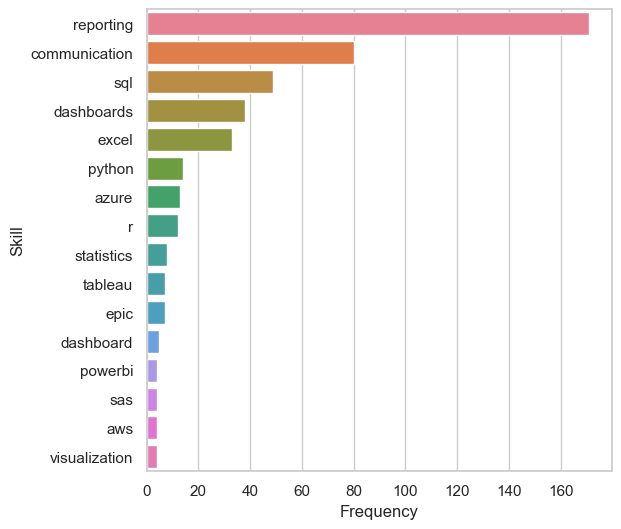

In [191]:
#seaborn bar chart
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("pastel")
plt.figure(figsize=(6, 6))
sns.barplot(skill_freq_df, x="Frequency", y="Skill", hue = "Skill")

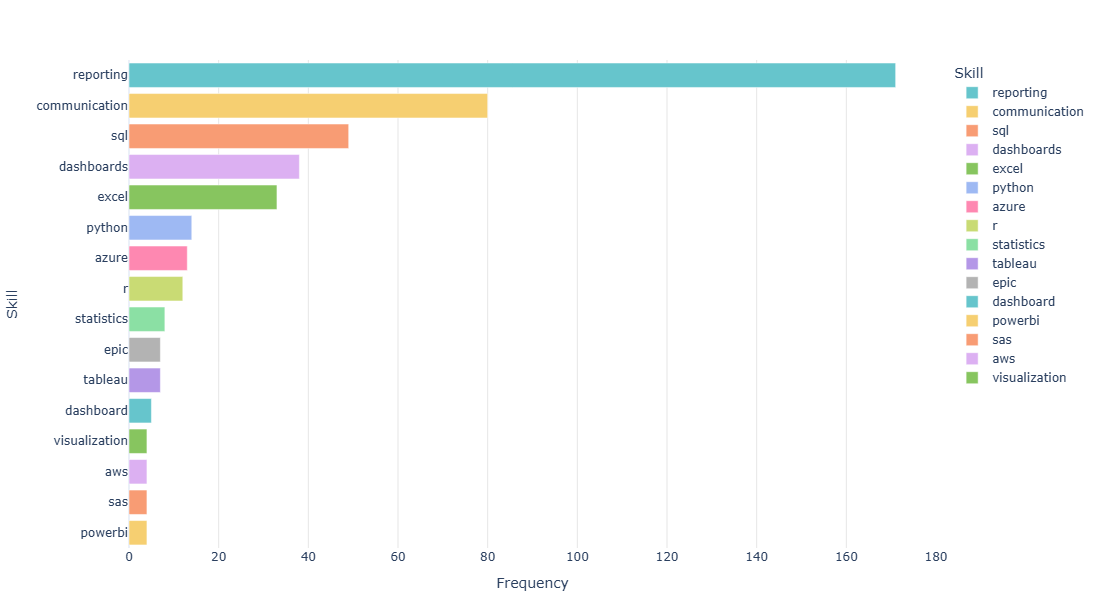

In [193]:
#plotly barchart
fig = px.bar(skill_freq_df, x="Frequency", y="Skill", color="Skill",  # this makes each bar colored
    color_discrete_sequence=px.colors.qualitative.Pastel )
fig.update_layout(
    template="plotly_white",
    height=600,
    margin=dict(l=80, r=40, t=60, b=40),
    xaxis=dict(showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    yaxis=dict(categoryorder="total ascending")  # biggest at top
)
fig.show()